<h1><center>Programming Exercise 4:<br>Neural Networks Learning</center></h1>

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat 
from scipy.misc import toimage
import random

mpl.rcParams['figure.figsize'] = (10,6)

# 1. Neural Networks (NN)
- In the previous exercise we implemented feedforward propagation for neural networks and used it to predict handwritten digits with the weights provided. Here, we will implement the backpropagation algorithm to learn the parameters for the NN

## 1.1 Visualizing the data
- Dataset of digit images is the same as last week's with the label "10" for the digit "0"

In [17]:
data1 = loadmat('ex4data1.mat')
# X is the design matrix of 5000 samples, 400 features for each
# Each sample actually comes from a 20 pixel by 20 pixel image (grayscale) thus comprises a 400-dimensional vector
# y is the output vector with class labels from 1-10; note that the 0 class has been mapped to the number 10 (this is to address an Octave/Matlab indexing issue)
X, y  = data1['X'], data1['y'].flatten() # flatten the second to make it a row vector (as our notational formalism expects)!!
X = np.c_[np.ones(np.shape(X)[0]),X] # add bias terms
np.place(y,y==10,0) # replace labeled 10's with 0's for all sample

- Recall from ex3 that to we need to flip them upsidedown and rotate them by 270 degrees to get the display right

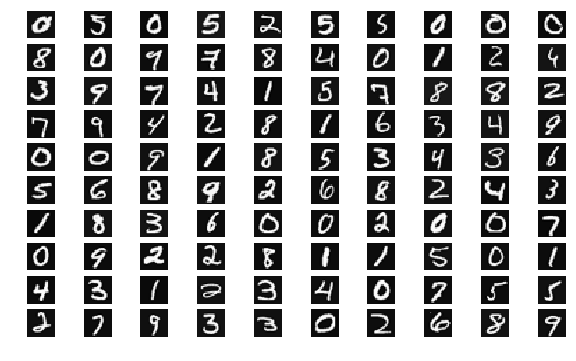

In [18]:
# Select 100 random indices and plot the samples
rand_ind = random.sample(range(0,X.shape[0]),100) # 100 random samples from given population (sequence)

# Save 100 random samples (reshaped into 20 by 20) in array
rand_sample_arr = np.array([np.flipud(np.reshape(X[ii_ind,1:],(20,20))) for ii_ind in rand_ind]) # ignoring the bias term

# Plot all images as subplots of one figure
plt.figure()
for ii_idx,ii_sample in enumerate(rand_sample_arr):
    ii_image = toimage(ii_sample)
    ii_image = ii_image.rotate(270)
    plt.subplot(10,10,ii_idx+1)
    plt.imshow(ii_image,cmap='Greys_r')
    plt.axis('off')
plt.show()

## 1.2 Model Representation
- As in ex3, we have a NN with 3 layers (input, hidden, and output) where the hidden layer has 25 activation units and the output has 10 units
- The network parameters $\Theta^{(1)}$ and $\Theta^{(2)}$ have already been trained and provided:

In [16]:
data2 = loadmat('ex4weights.mat')

theta1, theta2 = data2['Theta1'], data2['Theta2'] 

# Check shapes
print('theta1 shape is: {}'.format(np.shape(theta1)))
print('theta2 shape is: {}'.format(np.shape(theta2)))

theta1 shape is: (25, 401)
theta2 shape is: (10, 26)


## 1.3 Feedforward and Cost Function
- The NN cost function (cross-entropy loss) is:

$$
J(\Theta) = \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K \left[-y_k^{(i)}\log((h_\Theta(x^{(i)}))_k)-(1-y_k^{(i)})\log(1-(h_\Theta(x^{(i)}))_k)\right] + \frac{\lambda}{m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}\left(\Theta_{ji}^{(l)}\right)^2
$$

- Here we implement forward-prop and cost function w/o regularization
- Andrew NG recommended doing everything with for loops, however we already vectorized the forward prop procedure in ex3.ipynb (see Section 2 notes and `predict` function). We'll edit the `predict` function of ex3 here to give us back the (probability matrix) outputs rather than the label prediction

In [26]:
def forwardProp(theta1,theta2,X):
    '''
    Performs forward propagation to give output of a three-layer Neural Network with p
    (not counting bias) activation units in second layer (hidden) and K units in output 
    layer given the weight matrices of propagation Theta1 and Theta2 and design matrix 
    of samples X
    
    Parameters
    ----------
    theta1: p by (n+1) matrix of optimized thetas for transition between input layer and hidden layer
    theta2: K by (p+1) matrix of optimized thetas for transition between hidden layer and output layer
    X: m by (n+1) design matrix (includes bias units)
    
    Returns
    -------
    h: K by m matrix of probabilities for m samples to belong to K classes
    '''    
    
    # See ex3.ipynb Section 2 notes for explanation of procedures
    m = np.shape(X)[0] # sample size
    a2_matrix = sigmoid(theta1 @ X.T) # initial layer 2 activation units 
    bias_row = np.ones((1,m)) # bias term for second layer activation
    a2_matrix = np.vstack((bias_row,a2_matrix)) # insert bias term
    prob_matrix = sigmoid(theta2 @ a2_matrix) # Since this is the output, no bias term needs to be added for further computation
                                              # This is the matrix of probabilities, each colum for a sample
                                              # and a row for each class 0-9
    prob_matrix = np.roll(prob_matrix,1,axis=0) # shift entries in each column by 1, i.e colum [1,2,3] becomes [3,2,1]
                                                # see note in ex3.ipynb section 2 under definition of predict()
    return prob_matrix

- In Logistic Regression the cost function
$$
J(\theta)=\frac{-1}{m}\sum_{i=1}^m\left[y^{(i)}\log h_\theta(x^{(i)})+(1-y^{(i)})\log(1-h_\theta(x^{(i)}))\right]+\frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
$$
has the vectorized form:
$$
J(\theta)=\frac{-1}{m}\left[Y^T\cdot\log g(X\cdot \theta)+(1-Y)^T\cdot\log(1-g(X\cdot \theta))\right]+\frac{\lambda}{2m}\theta^T[1:]\cdot\theta[1:]
$$
for $X$ of shape $m\times(n+1)$, $\theta$ of shape $(n+1)\times 1$, and $Y$ of shape $m\times1$. This makes $g(X\cdot \theta)$ of shape $m\times1$ which can then be dotted by $Y^T$ to give us the scalar value of $J(\theta)$
- In NN, the hypothesis $h_\Theta(X)$ is a matrix of shape $K\times m$ for $K$ classes and $m$ samples
- Thus, for the NN the cost function can be vectorized as

## 1.4 Regularized Cost Function

# 2. Backpropagation

## 2.1 Sigmoid Gradient

## 2.2 Random Initialization

## 2.3 Backpropagation

## 2.4 Gradient Checking

## 2.5 Regularized Neural Networks

## 2.6 Learning Parameters Using `fmincg`

# 3. Visualizing the Hidden Layer

## 3.1 Optional Exercise